<a href="https://colab.research.google.com/github/merlinkalokerinos/Studies-OAMK/blob/main/Machine_learning_Correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os # u.a. zur Entwicklung plattformübergreifender Systempfade
import yaml # für Konfigurationen
import pandas as pd # Datenmanagement
import numpy as np # Hilfsfunktionen für mathematische Operationen

# Datenvisualisierung
import seaborn as sns 
%matplotlib inline
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

from sklearn.model_selection import StratifiedShuffleSplit, train_test_split # Datensplits
from sklearn.linear_model import LinearRegression # Machine Learning
from sklearn import metrics # Modellevaluierung


In [8]:
import pandas as pd 
df = pd.read_csv('test.csv')
df.head(10000)

,scraped location,purchasing price [in €],number of rooms,square metre,City district
0,"Helene-Mayer-Ring 4, Am Riesenfeld, München",970.00,1.0,28.00,11 Milbertshofen - Am Hart
1,"Helene-Mayer-Ring 4, Am Riesenfeld, München",980.00,1.0,30.00,11 Milbertshofen - Am Hart
2,"Schäftlarnstr. 135, Thalkirchen, München",990.00,1.0,35.00,19 Thalkirchen - Obersendling -Forstenried - F...
3,"Schäftlarnstr. 135, Thalkirchen, München",1000.00,1.0,33.00,19 Thalkirchen - Obersendling -Forstenried - F...
4,"Hohenlohestr. 37, Dom Pedro, München",1340.00,2.0,56.97,09 Neuhausen - Nymphenburg
...,...,...,...,...,...
6331,81379 München,2279.69,4.0,132.54,07 Sendling - Westpark
6332,81379 München,3114.54,5.0,141.57,07 Sendling - Westpark
6333,81379 München,1522.03,3.0,88.49,07 Sendling - Westpark
6334,81737 München,2390.00,2.0,65.00,16 Ramersdorf - Perlach


In [41]:
groupby = df.groupby('City district')['number of rooms'].count()
groupby.head(25)


City district
01 Altstadt - Lehel                                                 172
02 Ludwigsvorstadt - Isarvorstadt                                   264
03 Maxvorstadt                                                      174
04 Schwabing - West                                                 304
05 Au - Haidhausen                                                  270
06 Sendling                                                         160
07 Sendling - Westpark                                              286
08 Schwanthalerhöhe                                                  72
09 Neuhausen - Nymphenburg                                          264
10 Moosach                                                          196
11 Milbertshofen - Am Hart                                          252
12 Schwabing - Freimann                                             290
13 Bogenhausen                                                      417
14 Berg am Laim                                   

In [9]:
# wie viele Datenpunkte haben nicht-vollständige Attribute?
num_missing = len(df) - len(df.dropna())
ratio_missing = num_missing / len(df) 
# wir konvertieren in Prozente und runden auf 3 Nachkommastellen
ratio_missing = np.round(ratio_missing * 100, 3) 
print(f"{ratio_missing}% der Daten ({num_missing} Punkte) haben fehlende Werte!")

0.0% der Daten (0 Punkte) haben fehlende Werte!


In [10]:
df.loc[df.isnull().sum(axis=1) == 1] # ein kleiner Trick zum anzeigen von Daten mit fehlenden Attributen

,scraped location,purchasing price [in €],number of rooms,square metre,City district


In [11]:


df.isnull().sum(axis=0)



scraped location           0
purchasing price [in €]    0
number of rooms            0
square metre               0
City district              0
dtype: int64

In [13]:
derived_df = df[['purchasing price [in €]']]
print(derived_df, "\n")

      purchasing price [in €]
0                      970.00
1                      980.00
2                      990.00
3                     1000.00
4                     1340.00
...                       ...
6331                  2279.69
6332                  3114.54
6333                  1522.03
6334                  2390.00
6335                   607.50

[6336 rows x 1 columns] 



In [14]:


df = df.dropna() # löscht alle Zeilen mit fehlenden Attributen
df = df.reset_index(drop=True) # zählt unsere Daten neu durch



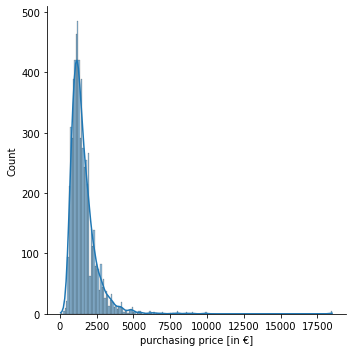

In [16]:


sns.displot(data=df, x="purchasing price [in €]", kde=True);


In [17]:


description = df.describe()
description



,purchasing price [in €],number of rooms,square metre
count,6336.000000,6336.000000,6336.000000
mean,1601.931252,2.232402,69.339372
std,975.459780,1.215432,40.469049
min,60.000000,1.000000,20.420000
25%,1040.000000,1.000000,41.000000
50%,1380.000000,2.000000,63.770000
75%,1900.000000,3.000000,86.000000
max,18500.000000,24.000000,700.000000


In [18]:
avgkaufpreis = df["purchasing price [in €]"].mean()

In [19]:


bins = [0] + list(description["purchasing price [in €]"][
    ["25%", "50%", "75%"]
].astype(int)) + [np.inf]
print(bins) # 0 bis 119.500 = 0 - 25% Quantil, 119.500 bis 179.700 = 25 - 50% Quantil, ...



[0, 1040, 1380, 1900, inf]


In [21]:


df["house_cat"] = pd.cut(
    df["purchasing price [in €]"],
    bins=bins,
    labels=["0 - 25%", "25 - 50%", "50 - 75%", "75 - 100%"]
)



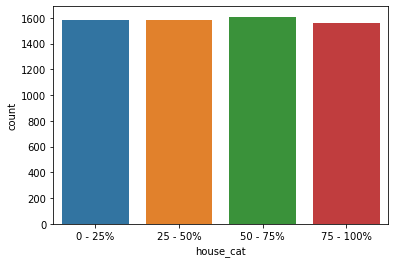

In [22]:


sns.countplot(data=df, x="house_cat");



In [23]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=0)
for train_index, test_index in split.split(df, df["house_cat"]):
    df_train = df.loc[train_index]
    df_test = df.loc[test_index]

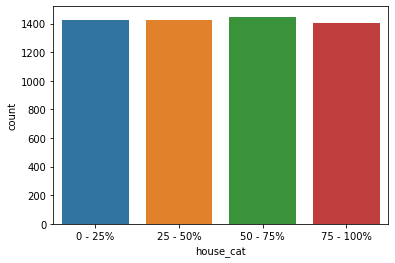

In [24]:


sns.countplot(data=df_train, x="house_cat");



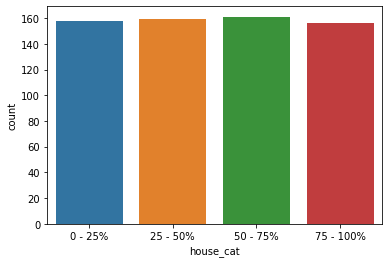

In [25]:


sns.countplot(data=df_test, x="house_cat");



In [26]:


df_train = df_train.drop("house_cat", axis=1)
df_test = df_test.drop("house_cat", axis=1)





# Correlation calculation

In [27]:
df_train.corr()["purchasing price [in €]"].abs().sort_values(ascending=False)

purchasing price [in €]    1.000000
square metre               0.849145
number of rooms            0.719135
Name: purchasing price [in €], dtype: float64

In [30]:
def engineer_features(df):
    df["ratio_rooms"] = df["square metre"] / df["number of rooms"]
    return df

In [31]:


df_train = engineer_features(df_train)
df_test = engineer_features(df_test)



In [32]:

df_train.corr()["purchasing price [in €]"].abs().sort_values(ascending=False)



purchasing price [in €]    1.000000
square metre               0.849145
number of rooms            0.719135
ratio_rooms                0.284673
Name: purchasing price [in €], dtype: float64

# ML-Coding

In [1]:


!pip3 install scikit-learn==1.0.0



     |████████████████████████████████| 23.1 MB 1.3 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


In [2]:
import os # u.a. zur Entwicklugn plattformübergreifender Systempfade
import pandas as pd # Datenmanagement
import numpy as np # Hilfsfunktionen für mathematische Operationen

# Datenvisualisierung
import seaborn as sns 
%matplotlib inline
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

from sklearn.model_selection import StratifiedShuffleSplit, train_test_split # Datensplits
from sklearn.linear_model import LinearRegression # Machine Learning
from sklearn import metrics # Modellevaluierung

## eigene Funktionen
##def filter_df_by_proximity(df, proximity):
##    return df.loc[df["ocean_proximity"] == proximity]

##def engineer_features(df):
##    df["ratio_bedrooms"] = df["total_bedrooms"] / df["total_rooms"]
##    df["people_per_household"] = df["population"] / df["households"]
##    return df

##def get_features_and_targets(df):
##    X = df.drop(["median_house_value"], axis=1).values
##    y = np.stack(df["median_house_value"])
##    return X, y

In [56]:
df2 = pd.read_csv('final test python.csv') # Wir lesen die Datei housing.csv ein

del df2['scraped location']

del df2['City district']
del df2['Indikatoren 2021.city district']


,purchasing price [in €],number of rooms,square metre,Indikatoren 2021.crime rate,Indikatoren 2021.Population - total,Indikatoren 2021.Population - german with migration background,Indikatoren 2021.Population - women (15 to 44),Indikatoren 2021.Population - not german,Indikatoren 2021.Population - total (0 to 17),Indikatoren 2021.Population - not german (0 to 17),...,Indikatoren 2021.Migration rates - Exterior migration,Indikatoren 2021.Migration rates - overall migration,Indikatoren 2021.Migration rates by nationality - medium population (german),Indikatoren 2021.Migration rates by nationality - medium population (not german),Indikatoren 2021.Migration rates by nationality - Internal migration (german),Indikatoren 2021.Migration rates by nationality - Internal migration (not german,Indikatoren 2021.Migration rates by nationality - Exterior migration (german),Indikatoren 2021.Migration rates by nationality - Exterior migration (not german,Indikatoren 2021.Migration rates by nationality - overall migration (german),Indikatoren 2021.Migration rates by nationality - overall migration (not german)
0,970.0,1.0,28.00,0.044207,75658.0,21.7,16793.0,42.0,15.1,8.6,...,1.0,-8.2,44262.0,31520.0,-14.8,-1.4,-16.7,25.8,-31.5,24.4
1,980.0,1.0,30.00,0.044207,75658.0,21.7,16793.0,42.0,15.1,8.6,...,1.0,-8.2,44262.0,31520.0,-14.8,-1.4,-16.7,25.8,-31.5,24.4
2,790.0,1.0,32.00,0.044207,75658.0,21.7,16793.0,42.0,15.1,8.6,...,1.0,-8.2,44262.0,31520.0,-14.8,-1.4,-16.7,25.8,-31.5,24.4
3,2946.0,3.0,107.12,0.081244,20626.0,14.4,5009.0,24.7,12.0,6.3,...,-9.4,-20.0,15580.0,5154.0,-6.2,-24.1,-11.0,-4.3,-17.3,-28.3
4,820.0,2.5,65.00,0.081244,20626.0,14.4,5009.0,24.7,12.0,6.3,...,-9.4,-20.0,15580.0,5154.0,-6.2,-24.1,-11.0,-4.3,-17.3,-28.3
5,990.0,1.0,35.00,0.035716,99260.0,16.4,19884.0,28.6,15.7,11.5,...,-3.8,4.6,71021.0,28018.0,8.7,7.6,-16.3,27.9,-7.6,35.5
6,1000.0,1.0,33.00,0.035716,99260.0,16.4,19884.0,28.6,15.7,11.5,...,-3.8,4.6,71021.0,28018.0,8.7,7.6,-16.3,27.9,-7.6,35.5
7,1535.0,2.0,69.00,0.035716,99260.0,16.4,19884.0,28.6,15.7,11.5,...,-3.8,4.6,71021.0,28018.0,8.7,7.6,-16.3,27.9,-7.6,35.5
8,792.0,1.0,24.00,0.035716,99260.0,16.4,19884.0,28.6,15.7,11.5,...,-3.8,4.6,71021.0,28018.0,8.7,7.6,-16.3,27.9,-7.6,35.5
9,1215.0,1.0,36.00,0.028373,68255.0,15.8,17107.0,23.3,12.8,6.8,...,-3.3,-11.2,52620.0,15835.0,-10.5,0.7,-10.9,21.8,-21.4,22.5


In [59]:
import os
import tarfile
import urllib.request

df2 = pd.read_csv('final test python.csv') # Wir lesen die Datei housing.csv ein

del df2['scraped location']

del df2['City district']
del df2['Indikatoren 2021.city district']



df2 = df2.dropna() # löscht alle Zeile mit fehlenden Attributen
df2 = df2.reset_index(drop=True) # zählt unsere Daten neu durch

def get_features_and_targets(df2):
    X = df2.drop(["purchasing price [in €]"], axis=1).values
    y = np.stack(df2["purchasing price [in €]"])
    return X, y

description = df2.describe()

bins = [0] + list(description["purchasing price [in €]"][
    ["25%", "50%", "75%"]
].astype(int)) + [np.inf]

df2["house_cat"] = pd.cut(
    df2["purchasing price [in €]"],
    bins=bins,
    labels=["0 - 25%", "25 - 50%", "50 - 75%", "75 - 100%"]
)

split = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=0)
for train_index, test_index in split.split(df2, df2["house_cat"]):
    df2_train = df2.loc[train_index]
    df2_test = df2.loc[test_index]
    
df2_train = df2_train.drop("house_cat", axis=1)
df2_test = df2_test.drop("house_cat", axis=1)

##df_train = df_train.drop(filter_df_by_proximity(df_train, "ISLAND").index)
##df_test = df_test.drop(filter_df_by_proximity(df_test, "ISLAND").index)

##df_train = engineer_features(df_train)
##df_test = engineer_features(df_test)

df2_train_ml = pd.get_dummies(df2_train) # One-Hot Encoding
df2_test_ml = pd.get_dummies(df2_test)

X_train, y_train = get_features_and_targets(df2_train_ml)
X_test, y_test = get_features_and_targets(df2_test_ml)




clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression()

In [60]:


predictions = clf.predict(X_test)



In [66]:
print("Prediction\t|True Value")
print("-"*30)
for idx, (pred, annotation) in enumerate(zip(predictions, y_test)):
    if idx == 25:
        break
    pred = int(pred)
    annotation = int(annotation)
    print(f"{pred}\t\t|{annotation}")

Prediction	|True Value
------------------------------
1474		|1150
1081		|900
580		|2850
3108		|2600
1733		|1870
666		|550
2469		|2190
933		|990
3073		|3350
1133		|1070
2413		|1838
1209		|1033
886		|1100
1550		|1450
1945		|1500
629		|712
1977		|2120
1036		|2963
1230		|970
797		|880
1700		|1600
803		|750
744		|971
812		|975
1579		|1250


In [62]:
mae = metrics.mean_absolute_error(y_test, predictions)
mae_ratio = metrics.mean_absolute_percentage_error(y_test, predictions)
r2_score = metrics.r2_score(y_test, predictions)

In [63]:


print(f"Wir können durchschnittlich mit einem Fehler von {np.round(mae)} rechnen;")
print(f"Das entspricht im Schnitt einer Fehlerquote von {np.round(mae_ratio * 100)}%;")
print(f"Der R^2 Werte liegt bei {np.round(r2_score * 100)}%")



Wir können durchschnittlich mit einem Fehler von 299.0 rechnen;
Das entspricht im Schnitt einer Fehlerquote von 22.0%;
Der R^2 Werte liegt bei 80.0%


In [68]:


df2_test.iloc[0]



purchasing price [in €]                                                              1150.000000
number of rooms                                                                         2.000000
square metre                                                                           60.000000
Indikatoren 2021.crime rate                                                             0.023078
Indikatoren 2021.Population  - total                                                40704.000000
                                                                                        ...     
Indikatoren 2021.Migration rates by nationality - Internal migration (not german        7.300000
Indikatoren 2021.Migration rates by nationality - Exterior migration (german)         -16.400000
Indikatoren 2021.Migration rates by nationality - Exterior migration (not german        5.300000
Indikatoren 2021.Migration rates by nationality - overall migration (german)          -19.500000
Indikatoren 2021.Migration rat

In [69]:
X_test[0]

array([ 2.0000000e+00,  6.0000000e+01,  2.3078442e-02,  4.0704000e+04,
        1.5200000e+01,  9.8420000e+03,  2.7000000e+01,  1.3200000e+01,
        8.0000000e+00,  7.2300000e+01,  7.9400000e+01,  1.4600000e+01,
        4.6360000e+03,  3.0133000e+04,  5.9350000e+03,  2.8400000e+03,
        1.5400000e+01,  1.9700000e+01,  1.2800000e+02,  7.0000000e+00,
        1.2600000e+01,  5.6100000e+01,  3.2300000e+01,  7.8000000e+00,
        3.7000000e+00,  2.6400000e+01,  9.6000000e+00,  1.2000000e+00,
        2.0000000e-01,  1.0000000e-01,  6.2500000e+01,  1.0300000e+02,
        1.3000000e+00,  1.2900000e+01,  5.2500000e+02,  5.3300000e+01,
        3.0100000e+02,  5.2100000e+02,  1.0200000e+02,  2.9250000e+03,
        1.1810000e+03,  2.3740000e+03,  1.1510000e+03,  2.9370000e+03,
        1.1000000e+03,  2.8040000e+03,  1.0920000e+03, -4.4200000e+02,
        1.4000000e+02,  3.4580000e+03,  3.7000000e+01,  2.1000000e+02,
        9.8000000e+01,  1.1800000e+02,  1.2200000e+02,  5.2100000e+02,
      

In [70]:


single_pred = clf.predict([X_test[0]])[0]
print(f"Die Prognose liegt bei {single_pred}.")
print(f"Der Realwert war {y_test[0]}.")



Die Prognose liegt bei 1474.0343118487003.
Der Realwert war 1150.0.
